# Hypothesis testinng Assignment-3
TeleCall uses 4 centers around the globe to process customer order forms.
They audit a certain %  of the customer order forms. Any error in order
form renders it defective and has to be reworked before processing.  
The manager wants to check whether the defective %  varies by centre. 
Please analyze the data at 5% significance level and help the manager
draw appropriate inferences
Minitab File: CustomerOrderForm.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df=pd.read_csv('Costomer+OrderForm.csv')
df


,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [3]:
list(df)

['Phillippines', 'Indonesia', 'Malta', 'India']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [5]:
df.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [6]:
df.shape

(300, 4)

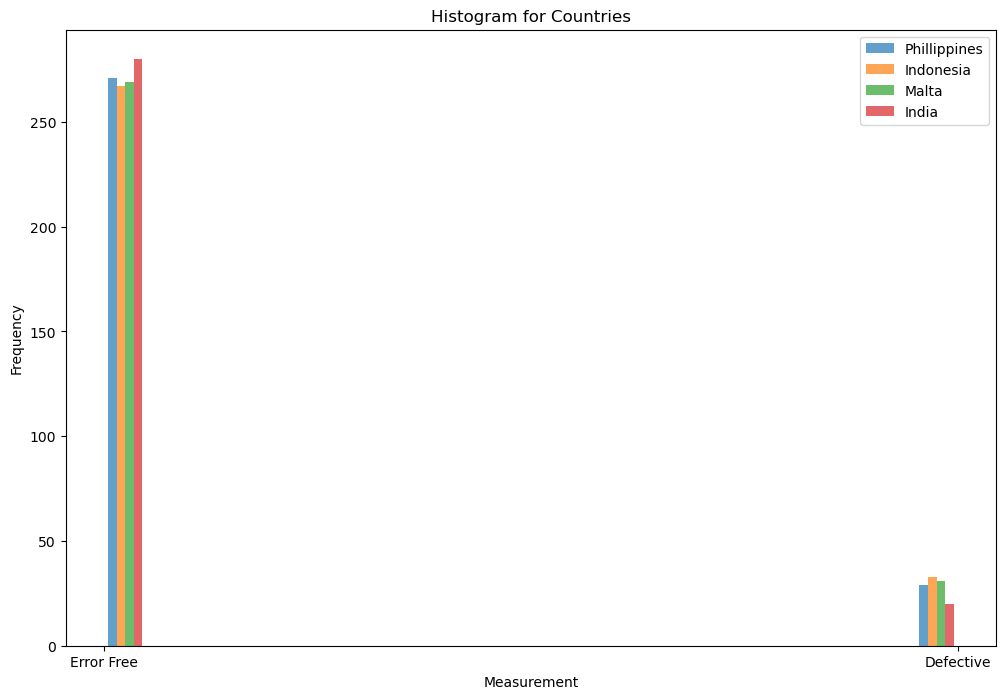

In [7]:
#---- histogram ---- #
column_names = df.columns
data = [df[column] for column in column_names]
plt.figure(figsize=(12, 8))
plt.hist(data, bins=20, alpha=0.7, label=column_names)
plt.xlabel('Measurement')
plt.ylabel('Frequency')
plt.title('Histogram for Countries')
plt.legend()
plt.show()


In [8]:
# value counts
new_df=(df['Phillippines'].value_counts(),'\n',df['Indonesia'].value_counts(),'\n',
      df['Malta'].value_counts(),'\n',df['India'].value_counts())
new_df


(Error Free    271
 Defective      29
 Name: Phillippines, dtype: int64,
 '\n',
 Error Free    267
 Defective      33
 Name: Indonesia, dtype: int64,
 '\n',
 Error Free    269
 Defective      31
 Name: Malta, dtype: int64,
 '\n',
 Error Free    280
 Defective      20
 Name: India, dtype: int64)

## - contingency table-
A contingency table is a table used in statistics to summarize and analyze the
relationship between two categorical variables. Categorical variables are variables
that can be divided into categories but cannot be measured in terms of magnitude. 


In [9]:
# creating contingency table
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
contingency_table


[[271, 267, 269, 280], [29, 33, 31, 20]]

In [10]:

# Excepted vales for observed data 
stat, p, df, exp = stats.chi2_contingency(contingency_table)

observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])


In [11]:
# hypothesis and t-test
t_test , pval = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",t_test,'\n', 'p-value =',pval)

### value of alpha=0.5
if p < 0.5:
    print("Null hypothesis H0 is rejected")
if p > 0.5:
    print("Null hypothesis holds true")



Test Statistic =  3.858960685820355 
 p-value = 0.4254298144535761
Null hypothesis H0 is rejected


### --INFERENCES--
Null hypothesis H0 is rejected.Independence of categorical variables Thus, 
customer order forms defective % does not varies by centre.
